In [1]:
#install specific version of libraries used
#! mamba install pandas==1.3.3  -y
#! mamba install numpy=1.21.2 -y
#!pip3 install seaborn

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the brackets, we put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.<br>

Because the data does not include headers, we can add an argument <code>headers = None</code> inside the <code>read_csv()</code> method so that pandas will not automatically set the first row as a header.<br>

You can also assign the dataset to any variable you create.

</p>


In [2]:
# Read the file and assign it to variable "df"
other_path = r"C:\Users\HP\Downloads\imports-85.data"
df = pd.read_csv(other_path, header=None)

After reading the dataset, we can use the <code>dataframe.head(n)</code> method to check the top n rows of the dataframe, where n is an integer. Contrary to <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> will show you the bottom n rows of the dataframe.


In [3]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]

To better describe our data, we can introduce a header.
Thus, we have to add headers manually.

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


We replace headers and recheck our dataframe:


In [5]:
df.columns = headers
df.head(10)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   
5        sedan          fwd           front        99.8  ...          136   
6        sedan          fwd           front       105.8  ...          136   
7        wagon          fwd           front       105.8  ...          136   
8        sedan          fwd           front       105.8  ...          131   
9    hatchback          4wd           front        99.5  ...          131   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   
5         mpfi  3.19    3.40               8.5        110      5500       19   
6         mpfi  3.19    3.40               8.5        110      5500       19   
7         mpfi  3.19    3.40               8.5        110      5500       19   
8         mpfi  3.13    3.40               8.3        140      5500       17   
9         mpfi  3.13    3.40               7.0        160      5500       16   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  
5          25  15250  
6          25  17710  
7          25  18920  
8          20  23875  
9          22      ?  

[10 rows x 26 columns]

Replacing the "?" symbol with NaN so the dropna() can remove the missing values:

In [6]:
df1=df.replace('?',np.NaN)

As the goal is to predict prices. Null Values in Price is not reasonable. Therfore we will be dropping the Values where the price is NULL.

In [7]:
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

symboling normalized-losses         make fuel-type aspiration  \
0           3               NaN  alfa-romero       gas        std   
1           3               NaN  alfa-romero       gas        std   
2           1               NaN  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2               NaN         audi       gas        std   
6           1               158         audi       gas        std   
7           1               NaN         audi       gas        std   
8           1               158         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   
12          0               188          bmw       gas        std   
13          0               188          bmw       gas        std   
14          1               NaN          bmw       gas        std   
15          0               NaN          bmw       gas        std   
16          0               NaN          bmw       gas        std   
17          0               NaN          bmw       gas        std   
18          2               121    chevrolet       gas        std   
19          1                98    chevrolet       gas        std   
20          0                81    chevrolet       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two  convertible          rwd           front        88.6  ...   
2           two    hatchback          rwd           front        94.5  ...   
3          four        sedan          fwd           front        99.8  ...   
4          four        sedan          4wd           front        99.4  ...   
5           two        sedan          fwd           front        99.8  ...   
6          four        sedan          fwd           front       105.8  ...   
7          four        wagon          fwd           front       105.8  ...   
8          four        sedan          fwd           front       105.8  ...   
10          two        sedan          rwd           front       101.2  ...   
11         four        sedan          rwd           front       101.2  ...   
12          two        sedan          rwd           front       101.2  ...   
13         four        sedan          rwd           front       101.2  ...   
14         four        sedan          rwd           front       103.5  ...   
15         four        sedan          rwd           front       103.5  ...   
16          two        sedan          rwd           front       103.5  ...   
17         four        sedan          rwd           front       110.0  ...   
18          two    hatchback          fwd           front        88.4  ...   
19          two    hatchback          fwd           front        94.5  ...   
20         four        sedan          fwd           front        94.5  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68               9.0        111   
1           130         mpfi  3.47    2.68               9.0        111   
2           152         mpfi  2.68    3.47               9.0        154   
3           109         mpfi  3.19    3.40              10.0        102   
4           136         mpfi  3.19    3.40               8.0        115   
5           136         mpfi  3.19    3.40               8.5        110   
6           136         mpfi  3.19    3.40               8.5        110   
7           136         mpfi  3.19    3.40               8.5        110   
8           131         mpfi  3.13    3.40               8.3        140   
10          108         mpfi  3.50    2.80               8.8        101   
11          108         mpfi  3.50    2.80               8.8        101   
12          164

Now, we have successfully read the raw dataset and added the correct headers into the dataframe.


In [8]:
df.to_csv(r"C:\Users\HP\Desktop\Pandas_data\automobile.csv", index=False)

<h1 id="basic_insight">Basic Insight of Dataset</h1

<h2>Data Types</h2>

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h2>Describe</h2>
Statistical summary of each column.

In [10]:
df.describe()

symboling  wheel-base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   201.000000   201.000000         201.000000  201.000000   201.000000  
mean   2555.666667   126.875622          10.164279   25.179104    30.686567  
std     517.296727    41.546834           4.004965    6.423220     6.815150  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2169.000000    98.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2926.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [11]:
# describe all the columns in "df" 
#Display helps us to display all the columns in the jupyter notebook
pd.set_option('display.max_columns', None)
df.describe(include = "all")

symboling normalized-losses    make fuel-type aspiration  \
count   201.000000               164     201       201        201   
unique         NaN                51      22         2          2   
top            NaN               161  toyota       gas        std   
freq           NaN                11      32       181        165   
mean      0.840796               NaN     NaN       NaN        NaN   
std       1.254802               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  \
count           199        201          201             201  201.000000   
unique            2          5            3               2         NaN   
top            four      sedan          fwd           front         NaN   
freq            113         94          118             198         NaN   
mean            NaN        NaN          NaN             NaN   98.797015   
std             NaN        NaN          NaN             NaN    6.066366   
min             NaN        NaN          NaN             NaN   86.600000   
25%             NaN        NaN          NaN             NaN   94.500000   
50%             NaN        NaN          NaN             NaN   97.000000   
75%             NaN        NaN          NaN             NaN  102.400000   
max             NaN        NaN          NaN             NaN  120.900000   

            length       width      height  curb-weight engine-type  \
count   201.000000  201.000000  201.000000   201.000000         201   
unique         NaN         NaN         NaN          NaN           6   
top            NaN         NaN         NaN          NaN         ohc   
freq           NaN         NaN         NaN          NaN         145   
mean    174.200995   65.889055   53.766667  2555.666667         NaN   
std      12.322175    2.101471    2.447822   517.296727         NaN   
min     141.100000   60.300000   47.800000  1488.000000         NaN   
25%     166.800000   64.100000   52.000000  2169.000000         NaN   
50%     173.200000   65.500000   54.100000  2414.000000         NaN   
75%     183.500000   66.600000   55.500000  2926.000000         NaN   
max     208.100000   72.000000   59.800000  4066.000000         NaN   

       num-of-cylinders  engine-size fuel-system  bore stroke  \
count               201   201.000000         201   197    197   
unique                7          NaN           8    38     36   
top                four          NaN        mpfi  3.62   3.40   
freq                157          NaN          92    23     19   
mean                NaN   126.875622         NaN   NaN    NaN   
std                 NaN    41.546834         NaN   NaN    NaN   
min                 NaN    61.000000         NaN   NaN    NaN   
25%                 NaN    98.000000         NaN   NaN    NaN   
50%                 NaN   120.000000         NaN   NaN    NaN   
75%                 NaN   141.000000         NaN   NaN    NaN   
max                 NaN   326.000000         NaN   NaN    NaN   

        compression-ratio horsepower peak-rpm    city-mpg  highway-mpg price  
count          201.000000        199      199  201.000000   201.000000   201  
unique                NaN         58       22         NaN          NaN   186  
top                   NaN         68     5500         NaN          NaN  8921  
freq                  NaN         19       36         NaN          NaN     2  
mean            10.164279        NaN      NaN   25.179104    30.686567   NaN  
std              4.004965        NaN      NaN    6.423220     6.815150   NaN  
min              7.000000        NaN      NaN   13.000000    16.000000   NaN  
25%          

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In this dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience.

In [12]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\107973966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?", np.nan, inplace = True)


symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. 

In [13]:
missing_data = df.isnull()
missing_data.head(5)

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  length  width  \
0       False         False            False       False   False  False   
1       False         False            False       False   False  False   
2       False         False            False       False   False  False   
3       False         False            False       False   False  False   
4       False         False            False       False   False  False   

   height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0   False        False        False             False        False   
1   False        False        False             False        False   
2   False        False        False             False        False   
3   False        False        False             False        False   
4   False        False        False             False        False   

   fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        False  False   False              False       False     False   
1        False  False   False              False       False     False   
2        False  False   False              False       False     False   
3        False  False   False              False       False     False   
4        False  False   False              False       False     False   

   city-mpg  highway-mpg  price  
0     False        False  False  
1     False        False  False  
2     False        False  False  
3     False        False  False  
4     False        False  False

"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [15]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [16]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df['normalized-losses'].notnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1241315801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


201

In [17]:
#Thus verified
df["normalized-losses"].isnull().sum()

0

<h4>Calculate the mean value for the "bore" column</h4>


In [18]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.330710659898477


<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [19]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1952189479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bore"].replace(np.nan, avg_bore, inplace=True)


In [20]:
avg_str = df['stroke'].astype('float').mean()
print('Average of stroke:',avg_str)
df['stroke'].replace(np.nan,avg_str,inplace=True)

Average of stroke: 3.256903553299492


C:\Users\HP\AppData\Local\Temp\ipykernel_25848\422707388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'].replace(np.nan,avg_str,inplace=True)


<h4>Calculate the mean value for the "horsepower" column</h4>


In [21]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 103.39698492462311


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [22]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\3312866579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


<h4>Calculate the mean value for "peak-rpm" column</h4>


In [23]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5117.587939698493


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [24]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\2061375298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


In [25]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. 

In [26]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously:


In [27]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\2406474689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-of-doors"].replace(np.nan, "four", inplace=True)


Finally, let's drop all rows that do not have price data:


In [28]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1825088382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["price"], axis=0, inplace=True)


In [29]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Let's list the data types for each column</h4>


In [30]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'.
For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'.

<h4>Convert data types to proper format</h4>


In [31]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1575912427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1575912427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1575912427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

<h4>Let us list the columns after the conversion</h4>


In [32]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Cleaned dataset with no missing values with all data in its proper format.

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


The formula for unit conversion assumed is:
L/100km = 235 / mpg

In [33]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio horsepower  peak-rpm  city-mpg  \
0        mpfi  3.47    2.68                9.0        111    5000.0        21   
1        mpfi  3.47    2.68                9.0        111    5000.0        21   
2        mpfi  2.68    3.47                9.0        154    5000.0        19   
3        mpfi  3.19    3.40               10.0        102    5500.0        24   
4        mpfi  3.19    3.40                8.0        115    5500.0        18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0

In [34]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\2501064845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city-L/100km'] = 235/df["city-mpg"]


symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio horsepower  peak-rpm  city-mpg  \
0        mpfi  3.47    2.68                9.0        111    5000.0        21   
1        mpfi  3.47    2.68                9.0        111    5000.0        21   
2        mpfi  2.68    3.47                9.0        154    5000.0        19   
3        mpfi  3.19    3.40               10.0        102    5500.0        24   
4        mpfi  3.19    3.40                8.0        115    5500.0        18   

   highway-mpg    price  city-L/100km  
0           27  13495.0     11.190476  
1           27  16500.0     11.190476  
2           26  16500.0     12.368421  
3           30  13950.0      9.791667  
4           22  17450.0     13.055556

In [35]:
df['highway-L/100km'] = 235/df['highway-mpg'] 
df.head()
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1386424216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highway-L/100km'] = 235/df['highway-mpg']
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1386424216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)


symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio horsepower  peak-rpm  city-mpg  \
0        mpfi  3.47    2.68                9.0        111    5000.0        21   
1        mpfi  3.47    2.68                9.0        111    5000.0        21   
2        mpfi  2.68    3.47                9.0        154    5000.0        19   
3        mpfi  3.19    3.40               10.0        102    5500.0        24   
4        mpfi  3.19    3.40                8.0        115    5500.0        18   

   highway-mpg    price  city-L/100km  highway-L/100km  
0           27  13495.0     11.190476         8.703704  
1           27  16500.0     11.190476         8.703704  
2           26  16500.0     12.368421         9.038462  
3           30  13950.0      9.791667         7.833333  
4           22  17450.0     13.055556        10.681818

<h2 id="data_normalization">Data Normalization</h2>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [36]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1432784809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['length']/df['length'].max()
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1432784809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['width'] = df['width']/df['width'].max()


In [37]:
df['height'] = df['height']/df['height'].max()
# show the scaled columns
df[["length","width","height"]].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1282263011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height']/df['height'].max()


length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027

<h2 id="binning">Binning</h2>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? 

<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [38]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\3348552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"]=df["horsepower"].astype(int, copy=True)


Text(0.5, 1.0, 'horsepower bins')

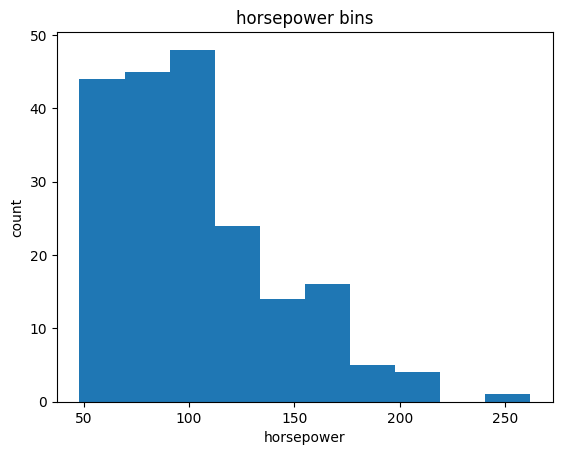

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [41]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group  names:


In [42]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.


In [43]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1821571573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )


horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low

Let's see the number of vehicles in each bin:


In [44]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'horsepower bins')

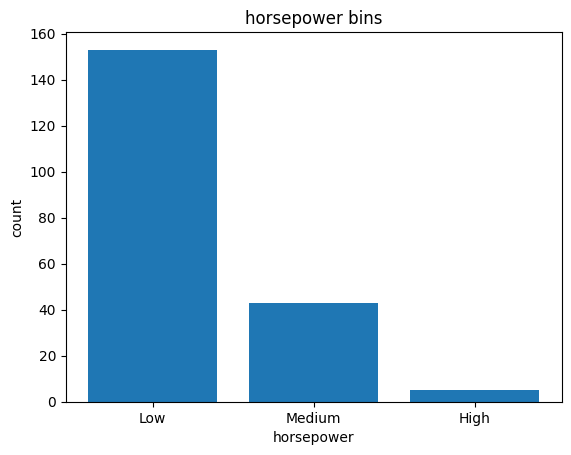

In [45]:
%matplotlib inline
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


In [46]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
We see the column "fuel-type" has two unique values: "gas" or "diesel". 
Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

In [47]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [48]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

Change the column names for clarity:


In [49]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

fuel-type-diesel  fuel-type-gas
0                 0              1
1                 0              1
2                 0              1
3                 0              1
4                 0              1

In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.


In [50]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [51]:
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length     width  \
0  convertible          rwd           front        88.6  0.811148  0.890278   
1  convertible          rwd           front        88.6  0.811148  0.890278   
2    hatchback          rwd           front        94.5  0.822681  0.909722   
3        sedan          fwd           front        99.8  0.848630  0.919444   
4        sedan          4wd           front        99.4  0.848630  0.922222   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
0  0.816054         2548        dohc             four          130   
1  0.816054         2548        dohc             four          130   
2  0.876254         2823        ohcv              six          152   
3  0.908027         2337         ohc             four          109   
4  0.908027         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0         111    5000.0   
1        mpfi  3.47    2.68                9.0         111    5000.0   
2        mpfi  2.68    3.47                9.0         154    5000.0   
3        mpfi  3.19    3.40               10.0         102    5500.0   
4        mpfi  3.19    3.40                8.0         115    5500.0   

   city-mpg  highway-mpg    price  city-L/100km  highway-L/100km  \
0        21           27  13495.0     11.190476         8.703704   
1        21           27  16500.0     11.190476         8.703704   
2        19           26  16500.0     12.368421         9.038462   
3        24           30  13950.0      9.791667         7.833333   
4        18           22  17450.0     13.055556        10.681818   

  horsepower-binned  fuel-type-diesel  fuel-type-gas  
0               Low                 0              1  
1               Low                 0              1  
2            Medium                 0              1  
3               Low                 0              1  
4               Low                 0              1

The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


In [52]:
dummy_variable_2 =pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_variable_2.head()

aspiration-std  aspiration-turbo
0               1                 0
1               1                 0
2               1                 0
3               1                 0
4               1                 0

In [53]:
df=pd.concat([df,dummy_variable_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)

## Clean Dataset


In [54]:
df.to_csv(r"C:\Users\HP\Desktop\Pandas_data\clean_df.csv", index=False)

<h3>What are the main characteristics that have the most impact on the car price?</h3>


In [55]:
path=r"C:\Users\HP\Desktop\Pandas_data\clean_df.csv"
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width    height  \
0          rwd           front        88.6  0.811148  0.890278  0.816054   
1          rwd           front        88.6  0.811148  0.890278  0.816054   
2          rwd           front        94.5  0.822681  0.909722  0.876254   
3          fwd           front        99.8  0.848630  0.919444  0.908027   
4          4wd           front        99.4  0.848630  0.922222  0.908027   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2548        dohc             four          130        mpfi  3.47   
1         2548        dohc             four          130        mpfi  3.47   
2         2823        ohcv              six          152        mpfi  2.68   
3         2337         ohc             four          109        mpfi  3.19   
4         2824         ohc             five          136        mpfi  3.19   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    2.68                9.0         111    5000.0        21           27   
1    2.68                9.0         111    5000.0        21           27   
2    3.47                9.0         154    5000.0        19           26   
3    3.40               10.0         102    5500.0        24           30   
4    3.40                8.0         115    5500.0        18           22   

     price  city-L/100km  highway-L/100km horsepower-binned  fuel-type-diesel  \
0  13495.0     11.190476         8.703704               Low                 0   
1  16500.0     11.190476         8.703704               Low                 0   
2  16500.0     12.368421         9.038462            Medium                 0   
3  13950.0      9.791667         7.833333               Low                 0   
4  17450.0     13.055556        10.681818               Low                 0   

   fuel-type-gas  aspiration-std  aspiration-turbo  
0              1               1                 0  
1              1               1                 0  
2              1               1                 0  
3              1               1                 0  
4              1               1                 0

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


In [56]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [57]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.139896          -0.029800    0.493203  0.608941   
stroke             -0.007992           0.055127    0.157964  0.123913   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075776           0.217300    0.371297  0.579688   
peak-rpm            0.279719           0.239544   -0.360233 -0.286035   
city-mpg           -0.035527          -0.225016   -0.470606 -0.665192   
highway-mpg         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   
city-L/100km        0.066171           0.238567    0.476153  0.657373   
highway-L/100km    -0.029807           0.181189    0.577576  0.707108   
fuel-type-diesel   -0.196735          -0.101546    0.307237  0.211187   
fuel-type-gas       0.196735           0.101546   -0.307237 -0.211187   
aspiration-std      0.054615           0.006911   -0.256889 -0.230085   
aspiration-turbo   -0.054615          -0.006911    0.256889  0.230085   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.139896   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029800   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493203   
length             0.857170  0.492063     0.880665     0.685025  0.608941   
width              1.000000  0.306002     0.866201     0.729436  0.544879   
height             0.306002  1.000000     0.307581     0.074694  0.180327   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644041   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572516   
bore               0.544879  0.180327     0.644041     0.572516  1.000000   
stroke             0.188814 -0.060822     0.167412     0.205806 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001250   
horsepower         0.614972 -0.086901     0.758001     0.822636  0.566786   
peak-rpm          -0.245852 -0.309913    -0.279350    -0.256753 -0.267338   
city-mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.582121   
highway-mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.591390   
price              0.751265  0.135486     0.834415     0.872335  0.543154   
city-L/100km       0.673363  0.003811     0.785353     0.745059  0.554726   
highway-L/100km    0.736728  0.084301     0.836921     0.783465  0.559197   
fuel-type-diesel   0.244356  0.281578     0.221046     0.070779  0.054435   
fuel-type-gas     -0.244356 -0.281578    -0.221046    -0.070779 -0.054435   
aspiration-std    -0.305732 -0.090336    -0.321955    -0.110040 -0.227782   
aspiration-turbo   0.305732  0.090336     0.321955     0.110040  0.227782   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.007992          -0.182196    0.075776  0.279719   
normalized-losses  0.055127          -0.114713    0.217300  0.239544   
wheel-base         0.157964           0.250313    0.371297 -0.360233   
length             0.123913           0.159733    0.579688 -0.286035   
width              0.188814           0.189867    0.614972 -0.245852   
height            -0.060822           0.259737   -0.086901 -0.309913   
curb-weight        0.167412           0.156433    0.758001 -0.2

Continuous Numerical Variables: 
<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

Positive Linear Relationship


C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1587169511.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')


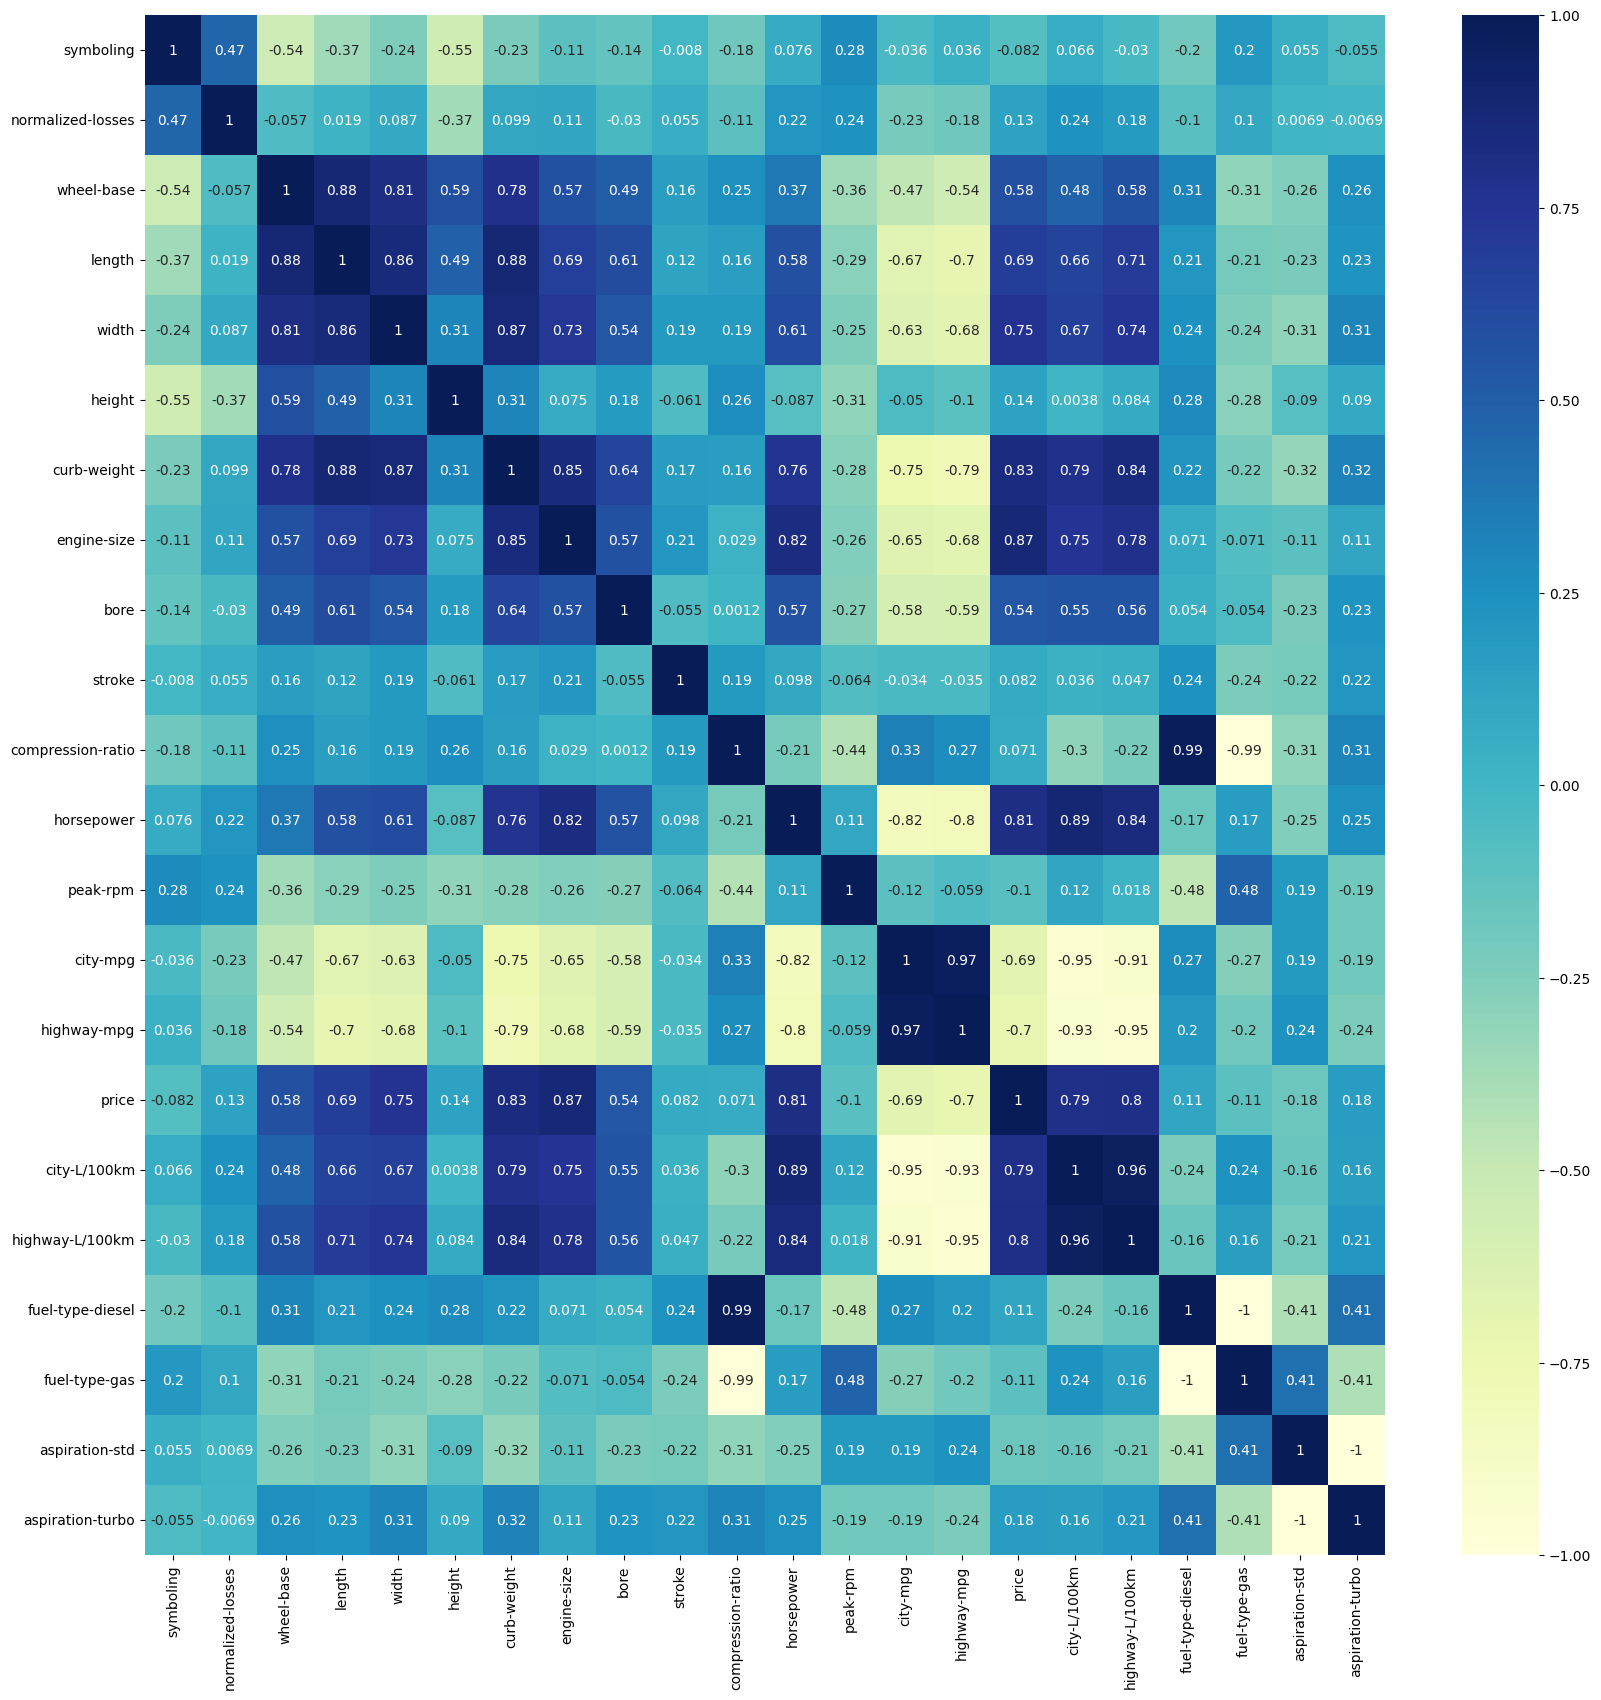

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

<Figure size 3000x3000 with 0 Axes>

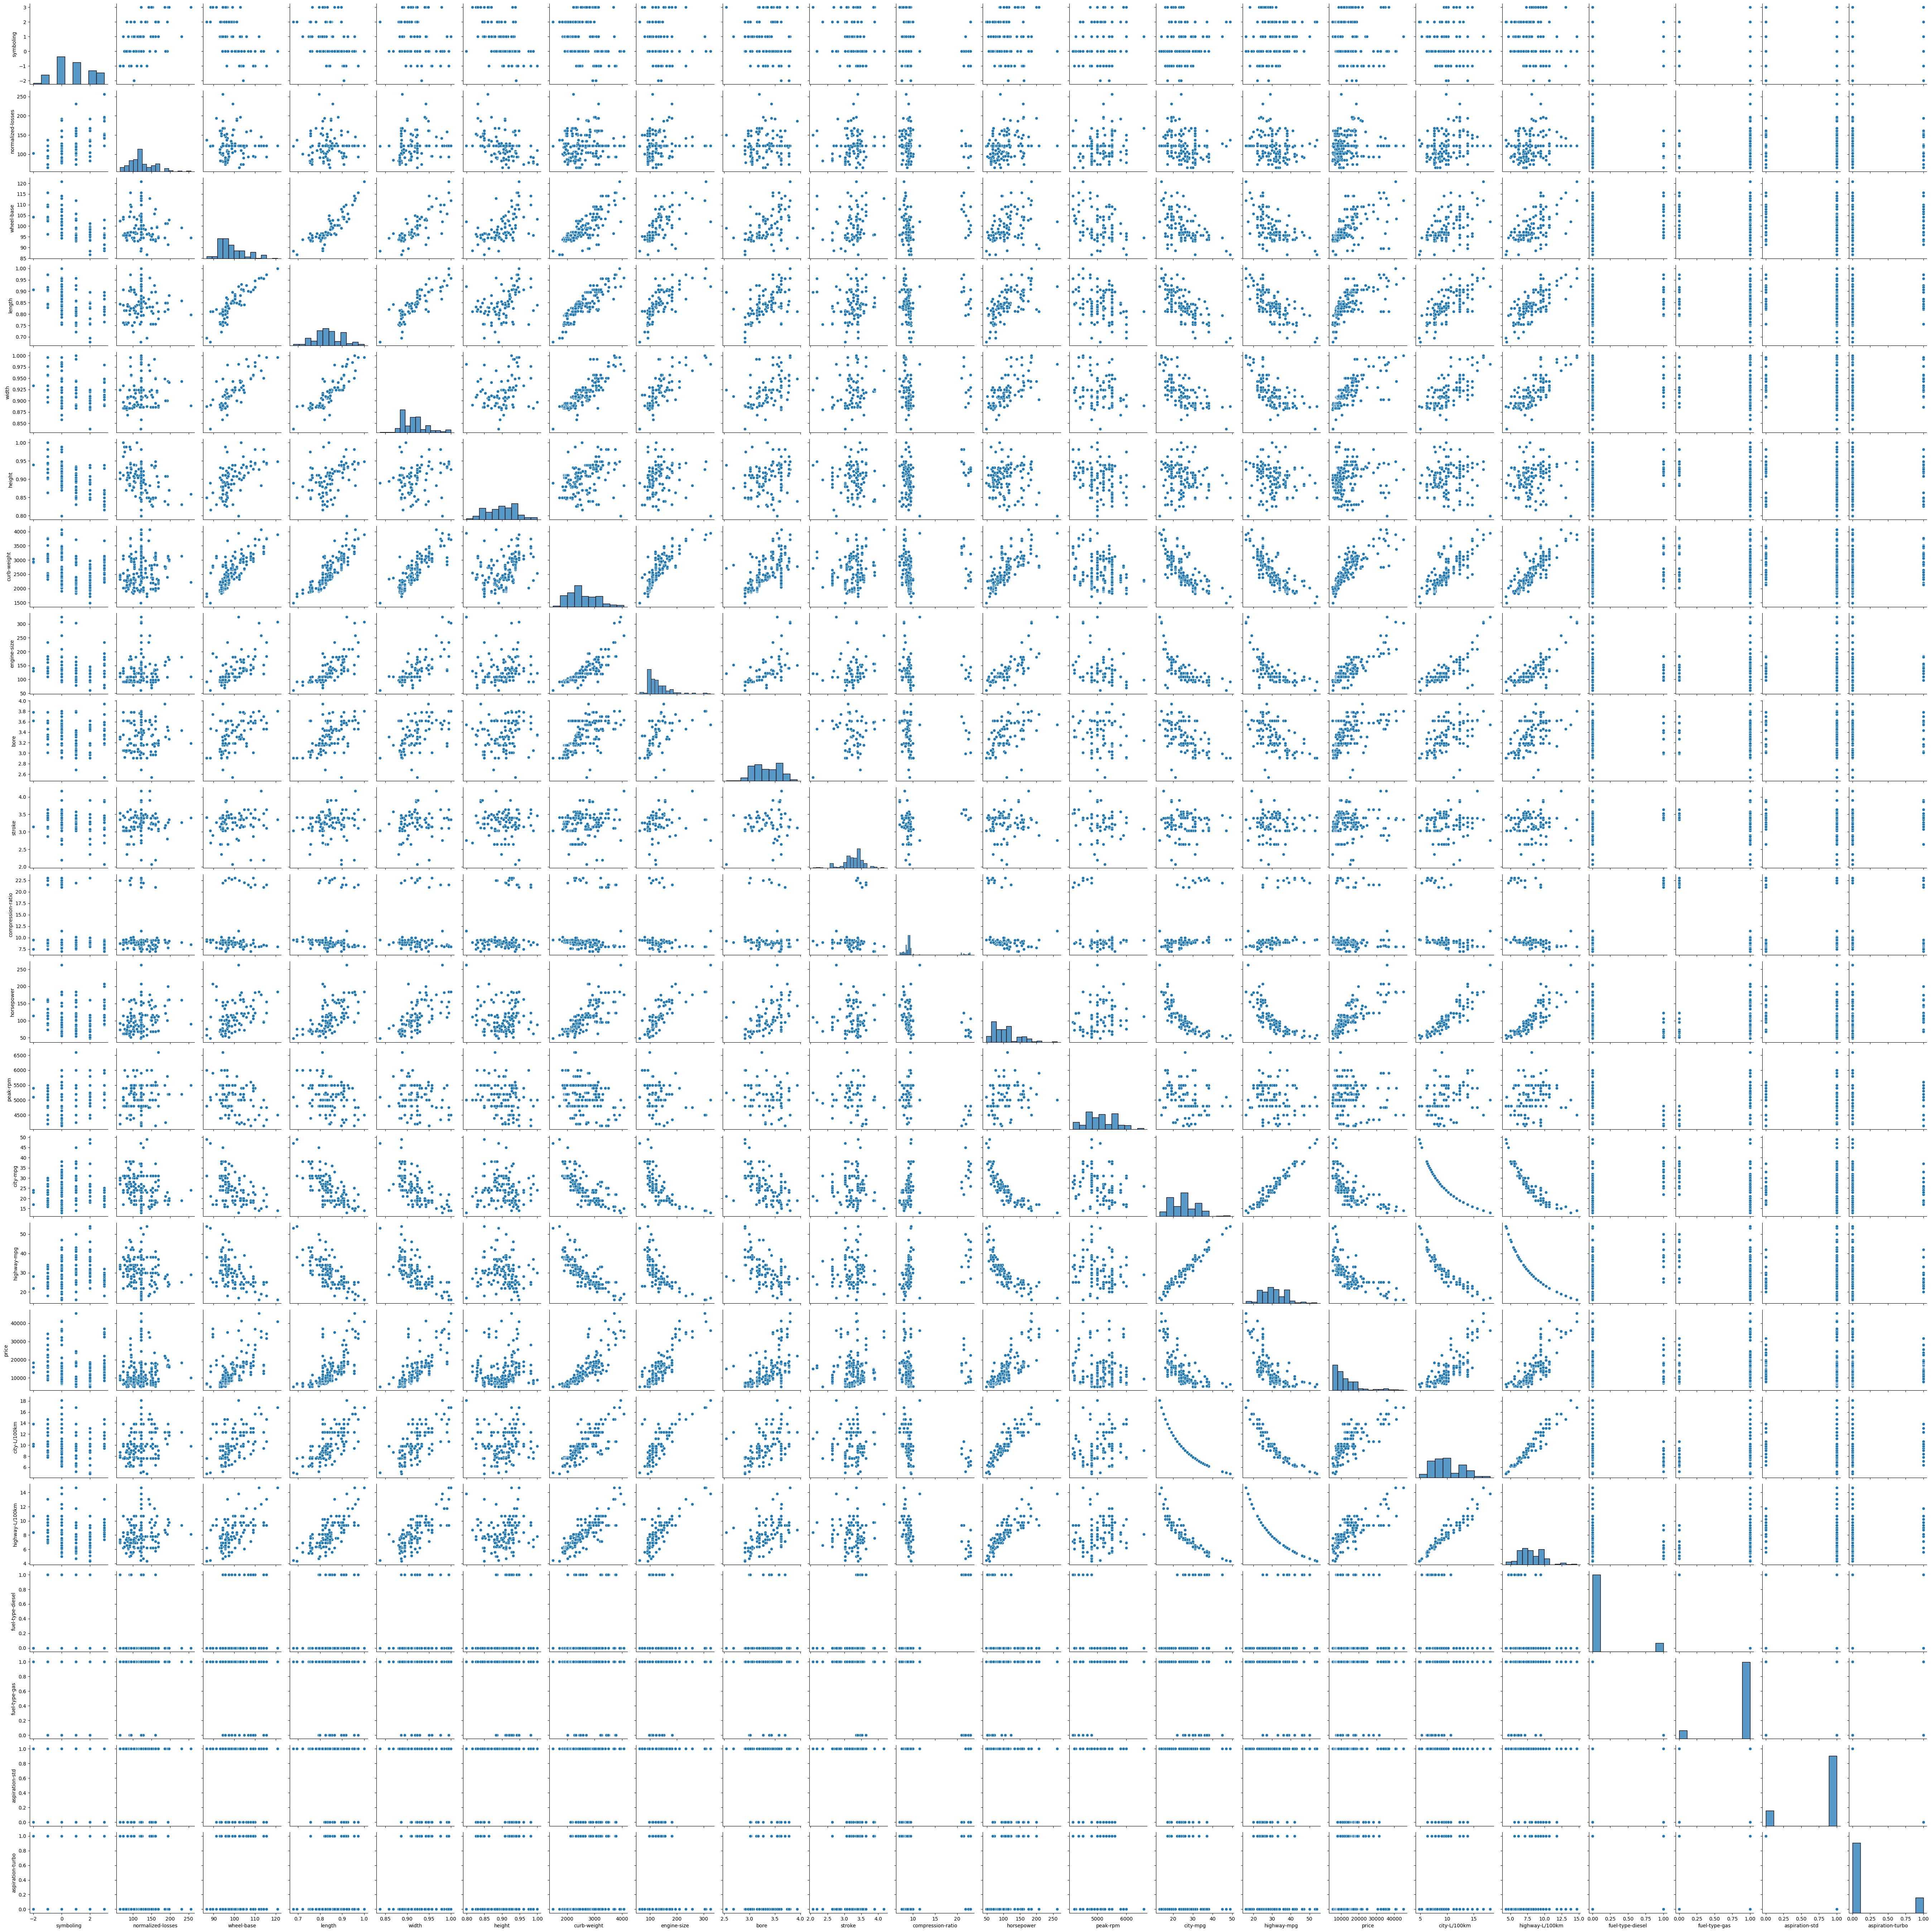

In [60]:
plt.figure(figsize = (30,30))
sns.pairplot(df)
plt.show()

Let's find the scatterplot of "engine-size" and "price".


(0.0, 53540.49148532255)

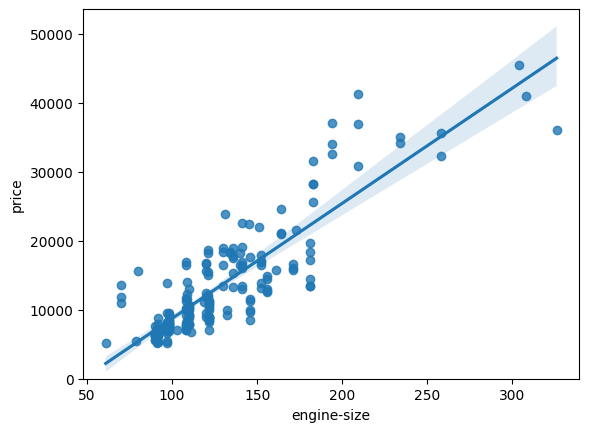

In [61]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

The correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [62]:
df[["engine-size", "price"]].corr()

engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000

Highway mpg is a potential predictor variable of price.

In [63]:
sns.regplot(x="highway-mpg", y="price", data=df)

<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.


In [64]:
df[['highway-mpg', 'price']].corr()

highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000

<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".


In [65]:
sns.regplot(x="peak-rpm", y="price", data=df)

<AxesSubplot: xlabel='peak-rpm', ylabel='price'>

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [67]:
df[['peak-rpm','price']].corr()

peak-rpm     price
peak-rpm  1.000000 -0.101542
price    -0.101542  1.000000

In [68]:
df[['stroke','price']].corr()

stroke     price
stroke  1.000000  0.082267
price   0.082267  1.000000

<AxesSubplot: xlabel='stroke', ylabel='price'>

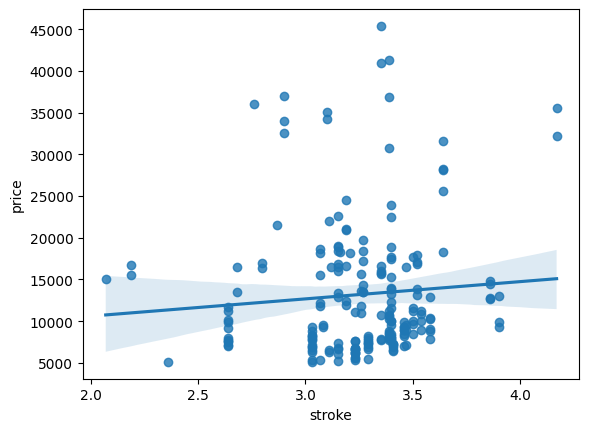

In [69]:
sns.regplot(x='stroke',y='price',data=df)

Categorical Variables

In [70]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot: xlabel='body-style', ylabel='price'>

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":


<AxesSubplot: xlabel='engine-location', ylabel='price'>

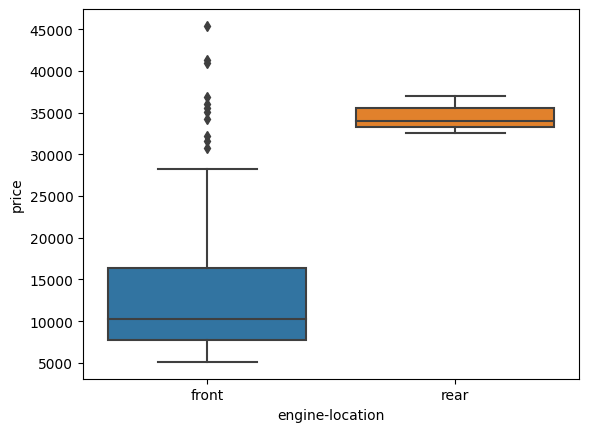

In [71]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


Let's examine "drive-wheels" and "price".


<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

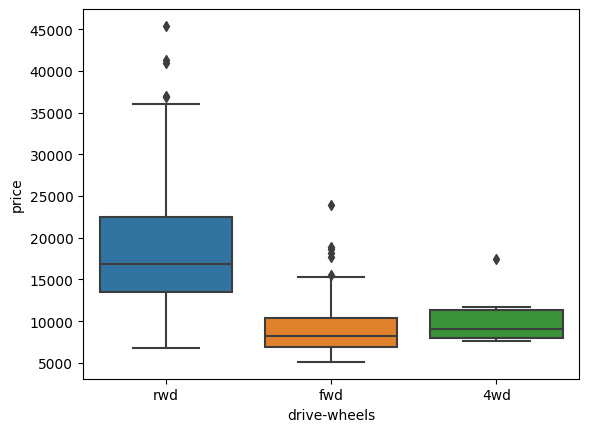

In [72]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


In [73]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean     0.899108  2555.666667   126.875622    3.330711    3.256904   
std      0.040933   517.296727    41.546834    0.268072    0.316048   
min      0.799331  1488.000000    61.000000    2.540000    2.070000   
25%      0.869565  2169.000000    98.000000    3.150000    3.110000   
50%      0.904682  2414.000000   120.000000    3.310000    3.290000   
75%      0.928094  2926.000000   141.000000    3.580000    3.410000   
max      1.000000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         201.000000  201.000000   201.000000  201.000000   201.000000   
mean           10.164279  103.393035  5117.587940   25.179104    30.686567   
std             4.004965   37.365623   478.113178    6.423220     6.815150   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5117.587940   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  262.000000  6600.000000   49.000000    54.000000   

              price  city-L/100km  highway-L/100km  fuel-type-diesel  \
count    201.000000    201.000000       201.000000        201.000000   
mean   13207.129353      9.944145         8.044957          0.099502   
std     7947.066342      2.534599         1.840739          0.300083   
min     5118.000000      4.795918         4.351852          0.000000   
25%     7775.000000      7.833333         6.911765          0.000000   
50%    10295.000000      9.791667         7.833333          0.000000   
75%    16500.000000     12.368421         9.400000          0.000000   
max    45400.000000     18.076923        14.687500          1.000000   

       fuel-type-gas  aspiration-std  aspiration-turbo  
count     201.000000      201.000000        201.000000  
mean        0.900498        0.820896          0.179104  
std         0.300083        0.384397          0.384397  
min         0.000000        0.000000          0.000000  
25%         1.000000        1.000000          0.000000  
50%         1.000000        1.000000          0.000000  
75%         1.000000        1.000000          0.000000  
max         1.000000        1.000000          1.000000

In [74]:
df.describe(include=['object'])

make num-of-doors body-style drive-wheels engine-location  \
count      201          201        201          201             201   
unique      22            2          5            3               2   
top     toyota         four      sedan          fwd           front   
freq        32          115         94          118             198   

       engine-type num-of-cylinders fuel-system horsepower-binned  
count          201              201         201               201  
unique           6                7           8                 3  
top            ohc             four        mpfi               Low  
freq           145              157          92               153

In [75]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

value_counts
fwd           118
rwd            75
4wd             8

In [76]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

value_counts
drive-wheels              
fwd                    118
rwd                     75
4wd                      8

In [77]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

value_counts
engine-location              
front                     198
rear                        3

After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.


In [78]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [79]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [80]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1990336142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


drive-wheels         price
0          4wd  10241.000000
1          fwd   9244.779661
2          rwd  19757.613333

In [81]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

In [82]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [83]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [84]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

body-style         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback   9957.441176
3        sedan  14459.755319
4        wagon  12371.960000

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

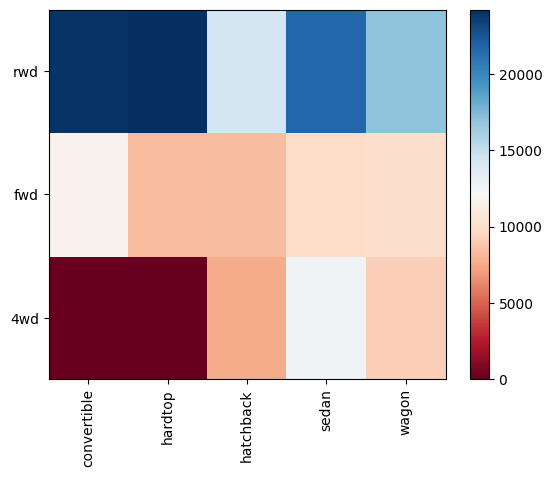

In [85]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?


In [86]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.139896          -0.029800    0.493203  0.608941   
stroke             -0.007992           0.055127    0.157964  0.123913   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075776           0.217300    0.371297  0.579688   
peak-rpm            0.279719           0.239544   -0.360233 -0.286035   
city-mpg           -0.035527          -0.225016   -0.470606 -0.665192   
highway-mpg         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   
city-L/100km        0.066171           0.238567    0.476153  0.657373   
highway-L/100km    -0.029807           0.181189    0.577576  0.707108   
fuel-type-diesel   -0.196735          -0.101546    0.307237  0.211187   
fuel-type-gas       0.196735           0.101546   -0.307237 -0.211187   
aspiration-std      0.054615           0.006911   -0.256889 -0.230085   
aspiration-turbo   -0.054615          -0.006911    0.256889  0.230085   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.139896   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029800   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493203   
length             0.857170  0.492063     0.880665     0.685025  0.608941   
width              1.000000  0.306002     0.866201     0.729436  0.544879   
height             0.306002  1.000000     0.307581     0.074694  0.180327   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644041   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572516   
bore               0.544879  0.180327     0.644041     0.572516  1.000000   
stroke             0.188814 -0.060822     0.167412     0.205806 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001250   
horsepower         0.614972 -0.086901     0.758001     0.822636  0.566786   
peak-rpm          -0.245852 -0.309913    -0.279350    -0.256753 -0.267338   
city-mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.582121   
highway-mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.591390   
price              0.751265  0.135486     0.834415     0.872335  0.543154   
city-L/100km       0.673363  0.003811     0.785353     0.745059  0.554726   
highway-L/100km    0.736728  0.084301     0.836921     0.783465  0.559197   
fuel-type-diesel   0.244356  0.281578     0.221046     0.070779  0.054435   
fuel-type-gas     -0.244356 -0.281578    -0.221046    -0.070779 -0.054435   
aspiration-std    -0.305732 -0.090336    -0.321955    -0.110040 -0.227782   
aspiration-turbo   0.305732  0.090336     0.321955     0.110040  0.227782   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.007992          -0.182196    0.075776  0.279719   
normalized-losses  0.055127          -0.114713    0.217300  0.239544   
wheel-base         0.157964           0.250313    0.371297 -0.360233   
length             0.123913           0.159733    0.579688 -0.286035   
width              0.188814           0.189867    0.614972 -0.245852   
height            -0.060822           0.259737   -0.086901 -0.309913   
curb-weight        0.167412           0.156433    0.758001 -0.2

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [87]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [88]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [89]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593172e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [90]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [91]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price


Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [92]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [93]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455181  with a P-value of P = 9.265491622201284e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [94]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441016e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [95]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [96]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [97]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

drive-wheels    price
0            rwd  13495.0
1            rwd  16500.0
3            fwd  13950.0
4            4wd  17450.0
5            fwd  15250.0
136          4wd   7603.0

In [98]:
df_gptest

drive-wheels   body-style    price
0            rwd  convertible  13495.0
1            rwd  convertible  16500.0
2            rwd    hatchback  16500.0
3            fwd        sedan  13950.0
4            4wd        sedan  17450.0
..           ...          ...      ...
196          rwd        sedan  16845.0
197          rwd        sedan  19045.0
198          rwd        sedan  21485.0
199          rwd        sedan  22470.0
200          rwd        sedan  22625.0

[201 rows x 3 columns]

We can obtain the values of the method group using the method "get_group".


In [99]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [100]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### fwd and rwd


In [101]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


Let's examine the other groups.


#### 4wd and rwd


In [102]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


<h4>4wd and fwd</h4>


In [103]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.4162011669784502


We notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


Do I know if the dealer is offering fair value for my trade-in?
Do I know if I put a fair value on my car?

In [104]:
path=r"C:\Users\HP\Desktop\Pandas_data\clean_df.csv"
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width    height  \
0          rwd           front        88.6  0.811148  0.890278  0.816054   
1          rwd           front        88.6  0.811148  0.890278  0.816054   
2          rwd           front        94.5  0.822681  0.909722  0.876254   
3          fwd           front        99.8  0.848630  0.919444  0.908027   
4          4wd           front        99.4  0.848630  0.922222  0.908027   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2548        dohc             four          130        mpfi  3.47   
1         2548        dohc             four          130        mpfi  3.47   
2         2823        ohcv              six          152        mpfi  2.68   
3         2337         ohc             four          109        mpfi  3.19   
4         2824         ohc             five          136        mpfi  3.19   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    2.68                9.0         111    5000.0        21           27   
1    2.68                9.0         111    5000.0        21           27   
2    3.47                9.0         154    5000.0        19           26   
3    3.40               10.0         102    5500.0        24           30   
4    3.40                8.0         115    5500.0        18           22   

     price  city-L/100km  highway-L/100km horsepower-binned  fuel-type-diesel  \
0  13495.0     11.190476         8.703704               Low                 0   
1  16500.0     11.190476         8.703704               Low                 0   
2  16500.0     12.368421         9.038462            Medium                 0   
3  13950.0      9.791667         7.833333               Low                 0   
4  17450.0     13.055556        10.681818               Low                 0   

   fuel-type-gas  aspiration-std  aspiration-turbo  
0              1               1                 0  
1              1               1                 0  
2              1               1                 0  
3              1               1                 0  
4              1               1                 0

<h2>1. Linear Regression and Multiple Linear Regression</h2>


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Linear regression object:

In [106]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


We want to look at how highway-mpg can help us predict car price.

In [107]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [108]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:


In [109]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Value of the intercept:

In [110]:
lm.intercept_

38423.3058581574

Value of the slope:

In [111]:
lm.coef_

array([-821.73337832])

In [112]:

lm1 = LinearRegression()
lm1

LinearRegression()

In [113]:
X=df[['engine-size']]
Y=df['price']
lm1.fit(X,Y)
lm1

LinearRegression()

In [114]:
lm1.coef_

array([166.86001569])

In [115]:
lm1.intercept_

-7963.338906281024

<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [116]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [117]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [118]:
lm.intercept_

-15831.930960299473

In [119]:
lm.coef_

array([53.66247317,  4.70938694, 81.44600167, 36.55016267])

What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


In [120]:
lm2 =LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

In [121]:
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Model Evaluation Using Visualization</h2>


Import the visualization package, seaborn:


<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48184.539287466265)

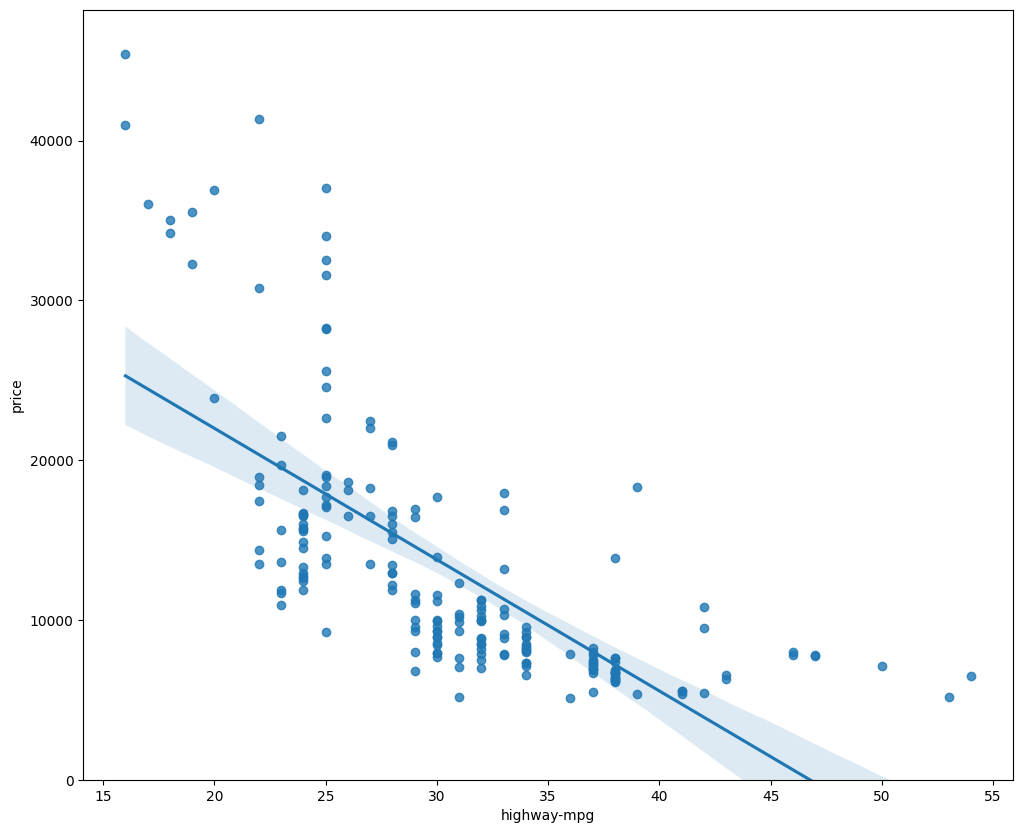

In [122]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

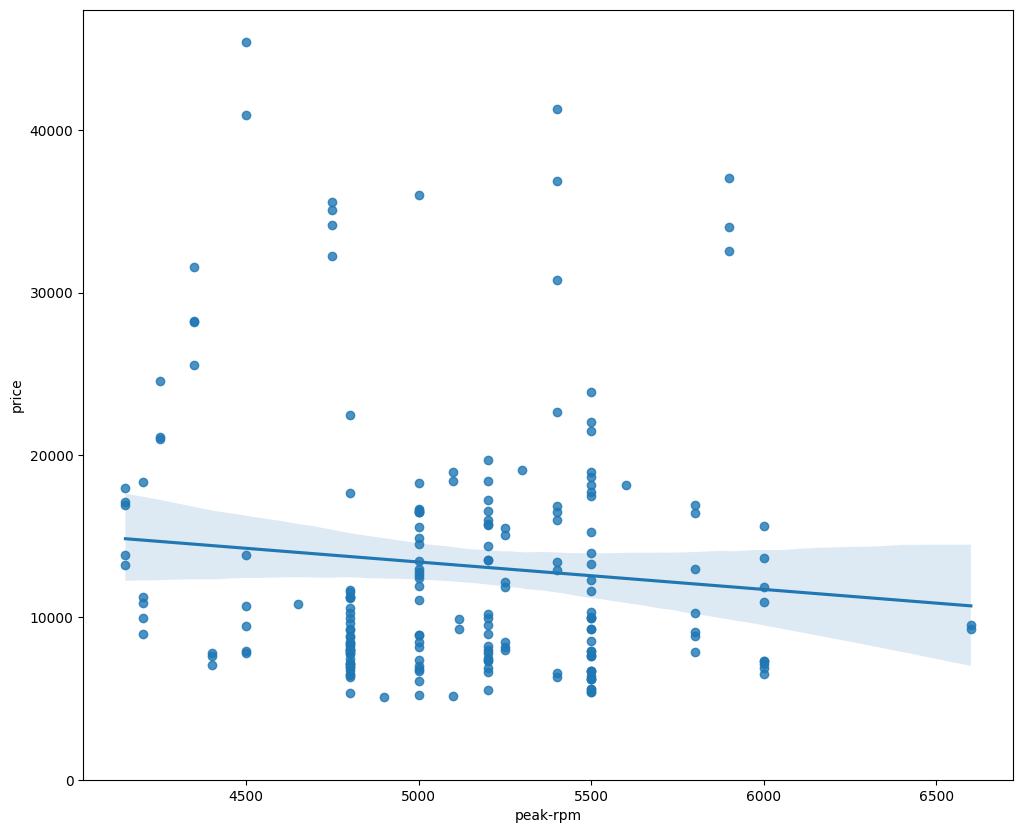

In [123]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


In [124]:
# Write your code below and press Shift+Enter to execute 
df[['peak-rpm','highway-mpg','price']].corr()

peak-rpm  highway-mpg     price
peak-rpm     1.000000    -0.058605 -0.101542
highway-mpg -0.058605     1.000000 -0.704692
price       -0.101542    -0.704692  1.000000

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


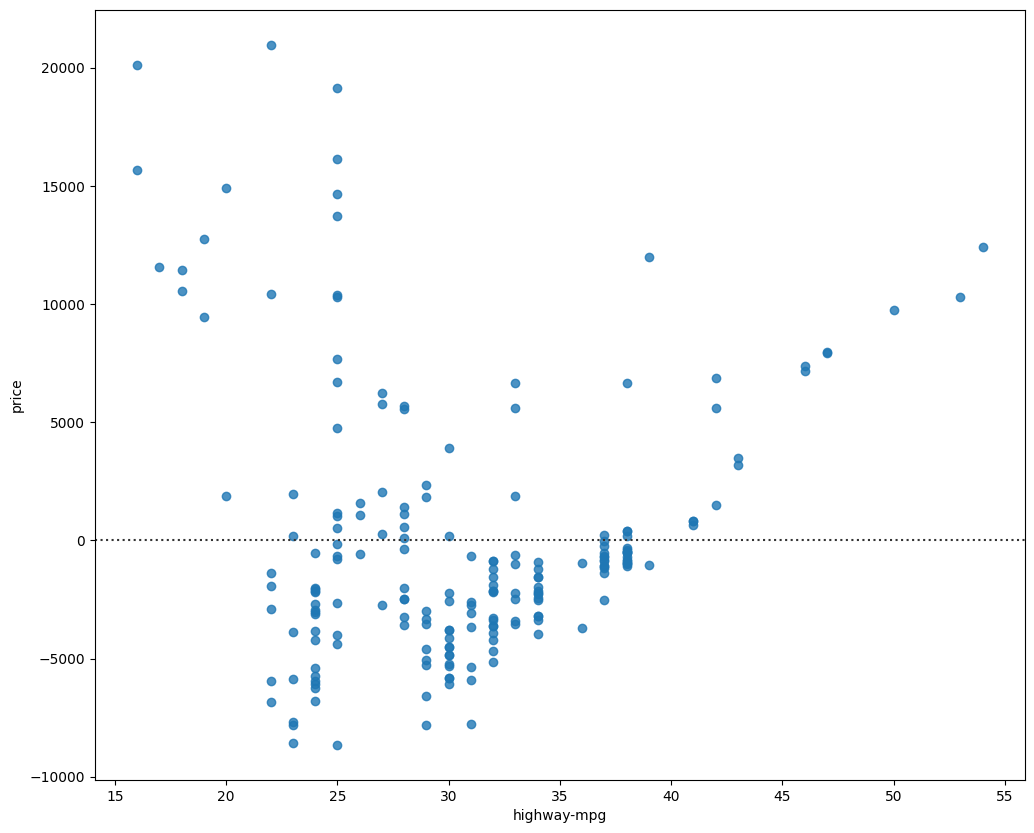

In [125]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

First, let's make a prediction:


In [126]:
Y_hat = lm.predict(Z)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

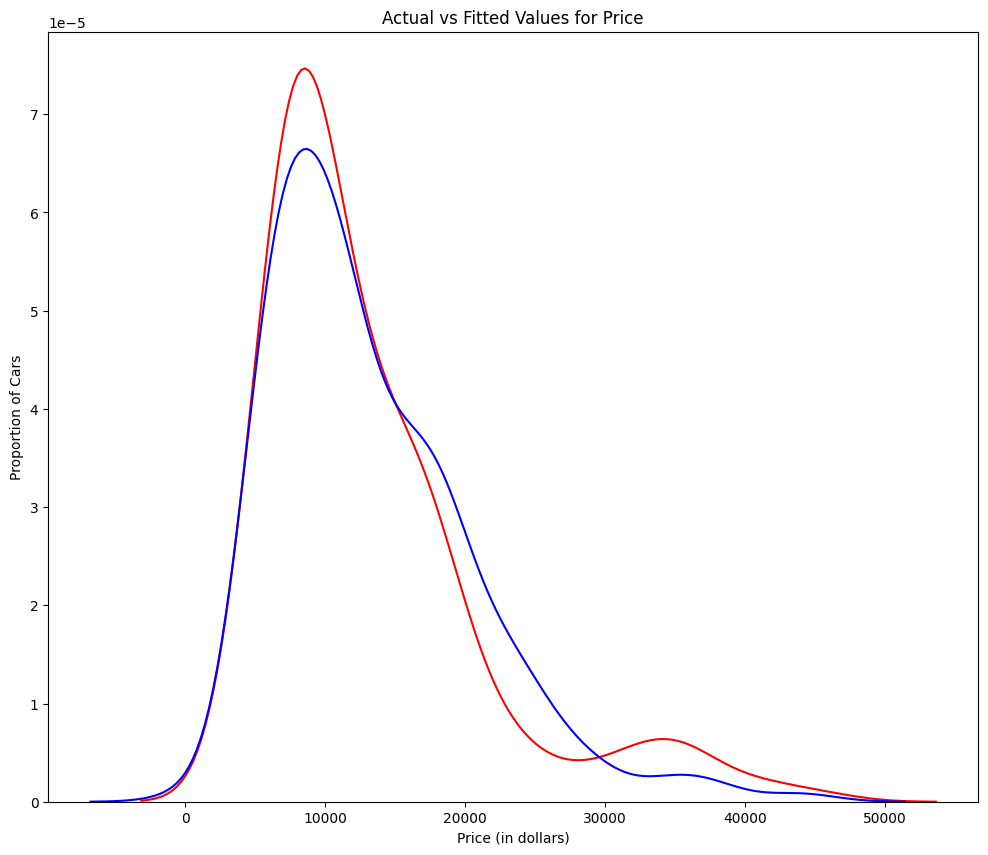

In [127]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [128]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [129]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [130]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:


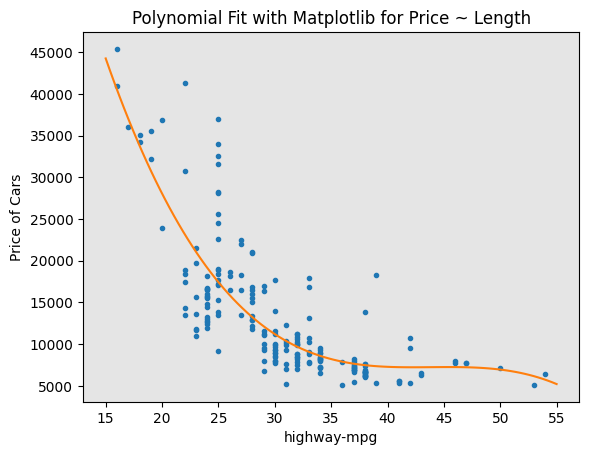

In [131]:
PlotPolly(p, x, y, 'highway-mpg')

In [132]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


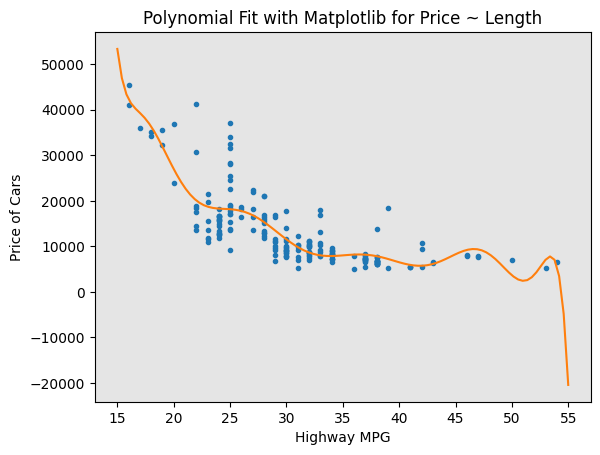

In [133]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

We can perform a polynomial transform on multiple features. First, we import the module:


In [134]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2:


In [135]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [136]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [137]:
Z.shape

(201, 4)

In [138]:
Z.head()

horsepower  curb-weight  engine-size  highway-mpg
0         111         2548          130           27
1         111         2548          130           27
2         154         2823          152           26
3         102         2337          109           30
4         115         2824          136           22

After the transformation, there are 201 samples and 15 features.


In [139]:
Z_pr.shape

(201, 15)

In [140]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [142]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [143]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [144]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [145]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])


Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [146]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778, 13867.78444008, 15454.84783873, 15972.88040209,
       17614.41285158, 10723.08344825])

<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [147]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [148]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [149]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [150]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [151]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8094390422815301


We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [152]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [153]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11975165.993303545


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


In [154]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [155]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:


In [156]:
mean_squared_error(df['price'], p(x))

20474146.426361207

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [157]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [158]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:


In [159]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [160]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

We can plot the data:


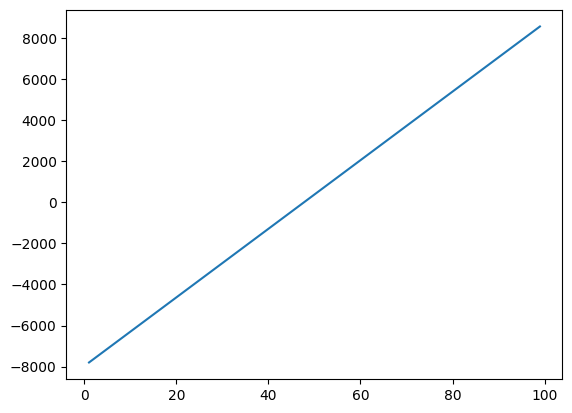

In [161]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


In [162]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Pandas_data\module_5_auto.csv' )

In [163]:
df.to_csv(r'C:\Users\HP\Desktop\Pandas_data\module_5_auto.csv')

In [164]:
df=df._get_numeric_data()
df.head()

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  symboling  \
0             0             0             0           0          3   
1             1             1             1           1          3   
2             2             2             2           2          1   
3             3             3             3           3          2   
4             4             4             4           4          2   

   normalized-losses  wheel-base    length     width  height  curb-weight  \
0                122        88.6  0.811148  0.890278    48.8         2548   
1                122        88.6  0.811148  0.890278    48.8         2548   
2                122        94.5  0.822681  0.909722    52.4         2823   
3                164        99.8  0.848630  0.919444    54.3         2337   
4                164        99.4  0.848630  0.922222    54.3         2824   

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  city-L/100km  diesel  gas  
0        21           27  13495.0     11.190476       0    1  
1        21           27  16500.0     11.190476       0    1  
2        19           26  16500.0     12.368421       0    1  
3        24           30  13950.0      9.791667       0    1  
4        18           22  17450.0     13.055556       0    1

In [165]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [166]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [167]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [168]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [169]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [170]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


The Goal is to also create a 40% split between Test & Train dataset. The intent being that we want to see the performance of both the split.

In [171]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [172]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:


In [173]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [174]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [175]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data compared to the training data.


In [176]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

Observation: The R^2 value of the model for test is much smaller than that of R^2 value of the train dataset

In [177]:
# Write your code below and press Shift+Enter to execute
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


<h2>Cross-Validation Score</h2>


Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


In [178]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [179]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [180]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:


In [181]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [182]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [183]:
 
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [184]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [185]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [186]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [187]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data:


In [188]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distpl

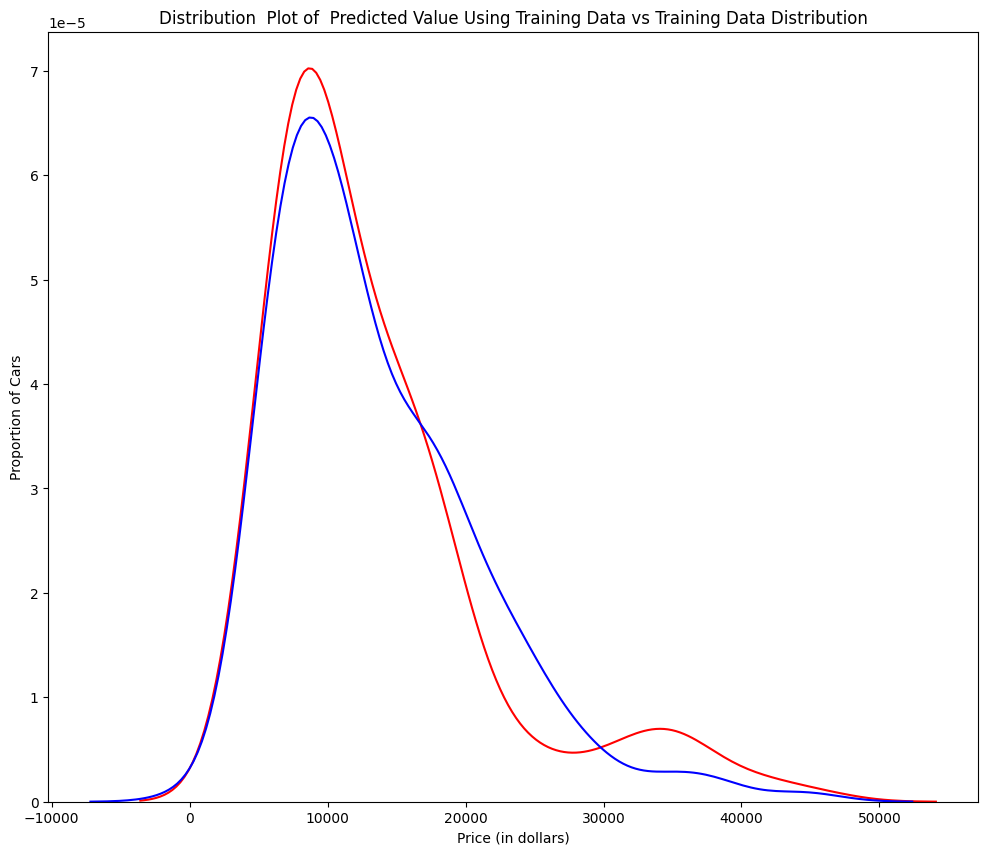

In [190]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distpl

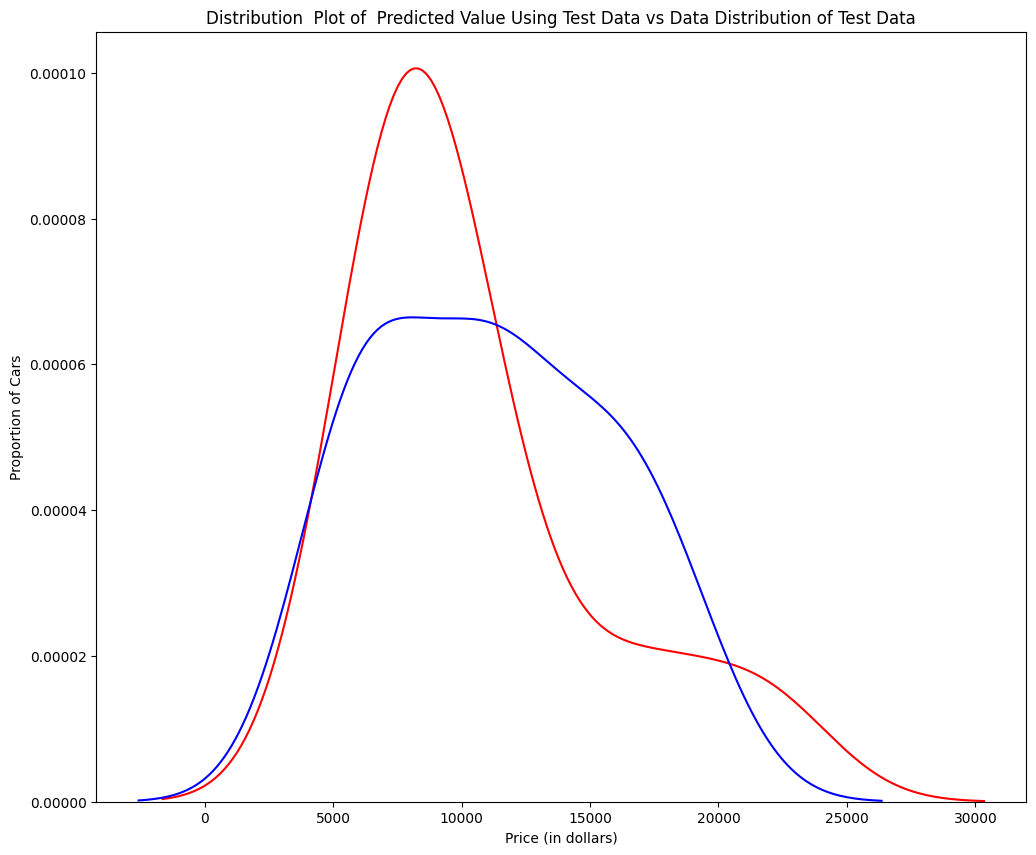

In [191]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [192]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [193]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [194]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [195]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [196]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.67965875,  7308.0119838 , 12213.80910478, 18893.1997037 ,
       19995.89349921])

Let's take the first five predicted values and compare it to the actual targets.


In [197]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.67965875  7308.0119838  12213.80910478 18893.1997037 ]
True values: [ 6295. 10698. 13860. 13499.]


C:\Users\HP\AppData\Local\Temp\ipykernel_25848\2143147880.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("True values:", y_test[0:4].values)


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


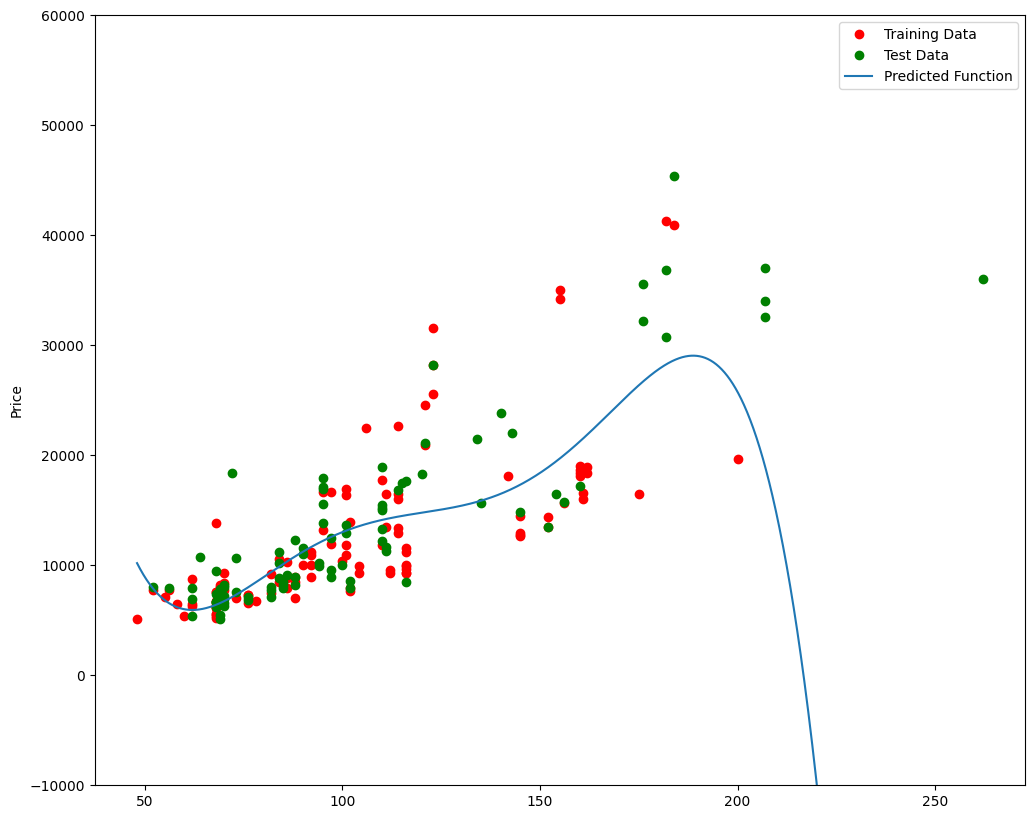

In [198]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [199]:
poly.score(x_train_pr, y_train)

0.5567716902513511

R^2 of the test data:


In [200]:
poly.score(x_test_pr, y_test)

-29.871476298381996

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

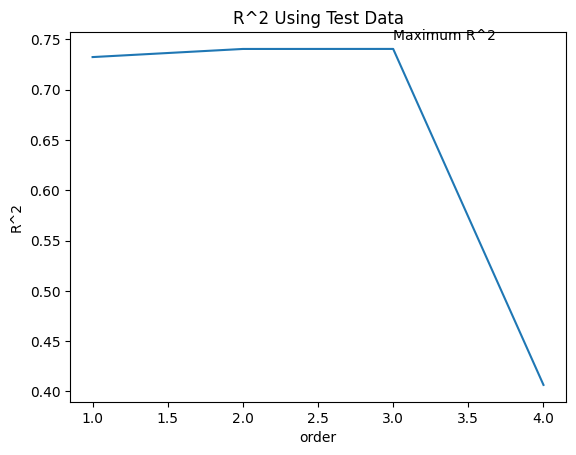

In [201]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [202]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


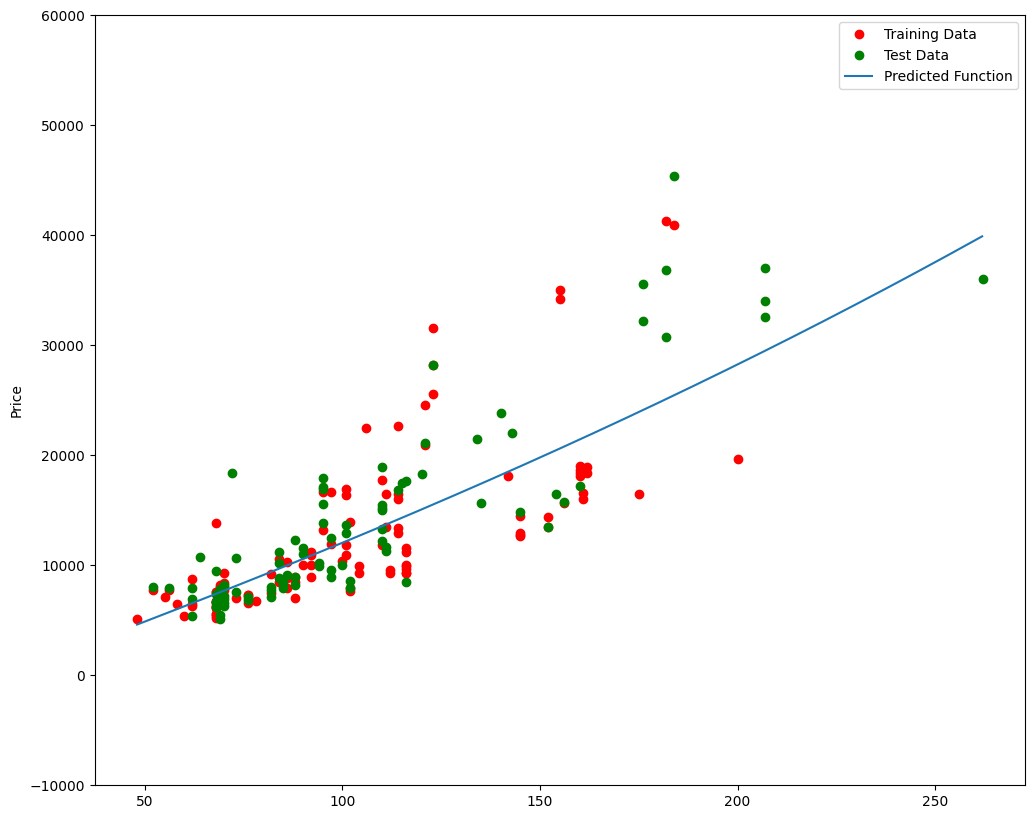

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [203]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [204]:
pr1=PolynomialFeatures(degree=2)

In [205]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [206]:
x_train_pr1.shape

(110, 15)

In [207]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

In [208]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\HP\AppData\Local\Temp\ipykernel_25848\483544288.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distpl

The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.